https://colab.research.google.com/drive/1VBiQoLRhYKNpFSg5irXBq0Bb2PMi4JZi?usp=sharing
# 위 링크의 Convnext Tiny 언더피팅 문제 해결
(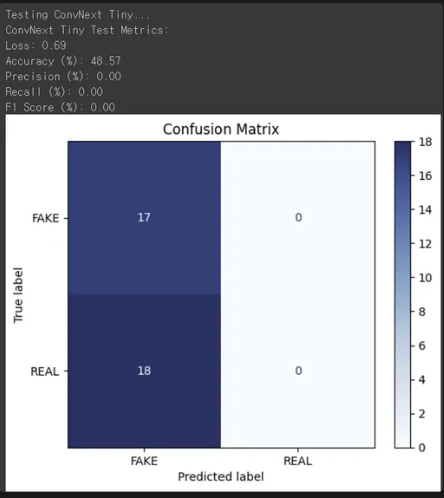)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import os
# check the current path
print(os.getcwd()) # /content

# You should copy the path : 왼쪽 폴더에서 오른쪽 버튼 후 경로복사
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/2024_OSP_SW')

print(os.getcwd()) # path has been changed

/content
/content/gdrive/MyDrive/Colab Notebooks/2024_OSP_SW


In [ ]:
# 라이브러리 설치
!pip install efficientnet-pytorch
!pip install albumentations
!pip install timm
!pip install scikit-learn matplotlib

  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16424 sha256=3629b1f571275f293b4c0b98e2a46e141654a42e941db091b57370c8e724bec7
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet-pytorch


In [ ]:
!pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118 torchaudio==2.0.2+cu118 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 880.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 91.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 100.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cu121
    Uninstalling torch-2.5.1+cu121:
      Successfully uninstalled torch-2.5.1+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.20.1+cu121
    Uninstalling torchvision-0.20.1+cu121:
      Successfully uninstalled torchvision-0.20.1+cu121
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.5.1+cu121
    Uninstalling torchaudio-2.5.1+cu121:
      Successfully uninstalled torchaudio-2.

In [ ]:
!pip install facenet-pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166

# 1. JSON 라벨링 확인

In [ ]:
import pandas as pd
import json

# JSON 파일 경로
json_file = "/content/gdrive/MyDrive/Colab Notebooks/2024_OSP_SW/dfdc_train_part_0/metadata.json"

# JSON 파일 로드
with open(json_file, "r") as f:
    metadata = json.load(f)

# JSON 데이터를 데이터프레임으로 변환
df = pd.DataFrame.from_dict(metadata, orient="index").reset_index()
df.columns = ["filename", "label", "split", "original"]

# 라벨링을 0과 1로 매핑
df["label"] = df["label"].map({"FAKE": 0, "REAL": 1})

# 데이터프레임에서 필요한 컬럼만 출력하도록 정리
print(df[["filename", "label", "split", "original"]].head(10))

         filename  label  split        original
0  owxbbpjpch.mp4      0  train  wynotylpnm.mp4
1  vpmyeepbep.mp4      1  train             NaN
2  fzvpbrzssi.mp4      1  train             NaN
3  htorvhbcae.mp4      0  train  wclvkepakb.mp4
4  fckxaqjbxk.mp4      0  train  vpmyeepbep.mp4
5  sphirandia.mp4      0  train  jawgcggquk.mp4
6  vsmadeuczx.mp4      0  train  qarqtkvgby.mp4
7  ohaqlzfnuv.mp4      0  train  sttnfyptum.mp4
8  komngcqveq.mp4      0  train  kqlvggiqee.mp4
9  iafvzgpbix.mp4      0  train  lzbmwwejxb.mp4


In [ ]:
import pandas as pd
import json

# JSON 파일 경로
json_file = "/content/gdrive/MyDrive/Colab Notebooks/2024_OSP_SW/dfdc_train_part_0/metadata.json"

# JSON 파일 로드
with open(json_file, "r") as f:
    metadata = json.load(f)

# JSON 데이터를 데이터프레임으로 변환
df = pd.DataFrame.from_dict(metadata, orient="index").reset_index()
df.columns = ["filename", "label", "split", "original"]

# 라벨링을 0과 1로 매핑
df["label"] = df["label"].map({"FAKE": 0, "REAL": 1})

# REAL과 FAKE의 개수 확인
real_count = (df["label"] == 1).sum()
fake_count = (df["label"] == 0).sum()

print(f"REAL videos: {real_count}")
print(f"FAKE videos: {fake_count}")

REAL videos: 86
FAKE videos: 1248


# 2. 전처리
## MTCNN 적용

In [ ]:
import os
import cv2
from facenet_pytorch import MTCNN
from multiprocessing import Pool
from PIL import Image
from tqdm import tqdm

# MTCNN 모델 초기화
mtcnn = MTCNN(keep_all=False)

# 경로 설정
input_dir = "/content/gdrive/MyDrive/Colab Notebooks/2024_OSP_SW/dfdc_train_part_0"
output_dir = "/content/gdrive/MyDrive/Colab Notebooks/2024_OSP_SW/2_processed_videos"

os.makedirs(output_dir, exist_ok=True)

# 스킵된 비디오 목록 저장
skipped_videos = []

# 비디오 처리 함수
def process_video(video_info):
    video_path, output_path = video_info
    if not os.path.exists(video_path):
        return output_path

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Skipping invalid video: {video_path}")
        skipped_videos.append(video_path)
        return None

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        box, _ = mtcnn.detect(Image.fromarray(rgb_frame))
        if box is not None:
            x1, y1, x2, y2 = map(int, box[0])

            if x1 < 0 or y1 < 0 or x2 < 0 or y2 < 0:
                continue
            cropped_face = frame[y1:y2, x1:x2]

            cropped_face_resized = cv2.resize(cropped_face, (224, 224))
            cv2.imwrite(output_path, cropped_face_resized)
            break

    cap.release()

    return output_path

video_info_list = [
    (os.path.join(input_dir, filename), os.path.join(output_dir, f"{os.path.splitext(filename)[0]}.jpg"))
    for filename in os.listdir(input_dir) if filename.endswith(".mp4")
]

print("Starting optimized video processing...")
for i in tqdm(video_info_list):
    process_video(i)
print("Processing complete.")

Starting optimized video processing...


100%|██████████| 1334/1334 [44:27<00:00,  2.00s/it]

Processing complete.


In [ ]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

input_dir = "/content/gdrive/MyDrive/Colab Notebooks/2024_OSP_SW/dfdc_train_part_0"
json_file = os.path.join(input_dir, 'metadata.json')

with open(json_file, "r") as f:
    metadata = json.load(f)

name, label = [], []
c2l = {"FAKE": 0, "REAL": 1}
for k ,v in metadata.items():
    name.append(k.replace('.mp4', '.jpg'))
    label.append(c2l[v['label']])

df = pd.DataFrame({'name':name, 'label':label})

df_label_1 = df[df['label'] == 1]
df_label_0 = df[df['label'] == 0]

n_samples = len(df_label_1)
df_label_0_sampled = resample(df_label_0,
                              replace=False,  # 복원 추출 여부
                              n_samples=n_samples,  # 샘플링 개수
                              random_state=42)  # 재현성을 위한 random state 설정

df_balanced = pd.concat([df_label_1, df_label_0_sampled])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Train dataset을 8:2로 나눔
train_df, test_df = train_test_split(df_balanced, test_size=0.2, random_state=42)

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# EfficientNet-B0 안정화 되었으나, ConvNext Tiny 언더 피팅 되어 해결위한 대안 두가지
## -> ConvNext Tiny의 파라미터 수를 늘리고,
##           초기 Learning Rate를 조정하여 underfitting 문제를 해결 시도


*   4, 5 -1. lr = 2e-5 적용
*   4, 5 -2. lr = 0.005 적용


# 4-1 Train 학습
## lr = 2e-5 적용

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/114M [00:00<?, ?B/s]

Training EfficientNet-B0...
Epoch 1/10 - Train Loss: 0.6795
Epoch 2/10 - Train Loss: 0.5331
Epoch 3/10 - Train Loss: 0.4519
Epoch 4/10 - Train Loss: 0.3430
Epoch 5/10 - Train Loss: 0.2595
Epoch 6/10 - Train Loss: 0.2006
Epoch 7/10 - Train Loss: 0.1147
Epoch 8/10 - Train Loss: 0.0931
Epoch 9/10 - Train Loss: 0.0547
Epoch 10/10 - Train Loss: 0.0345


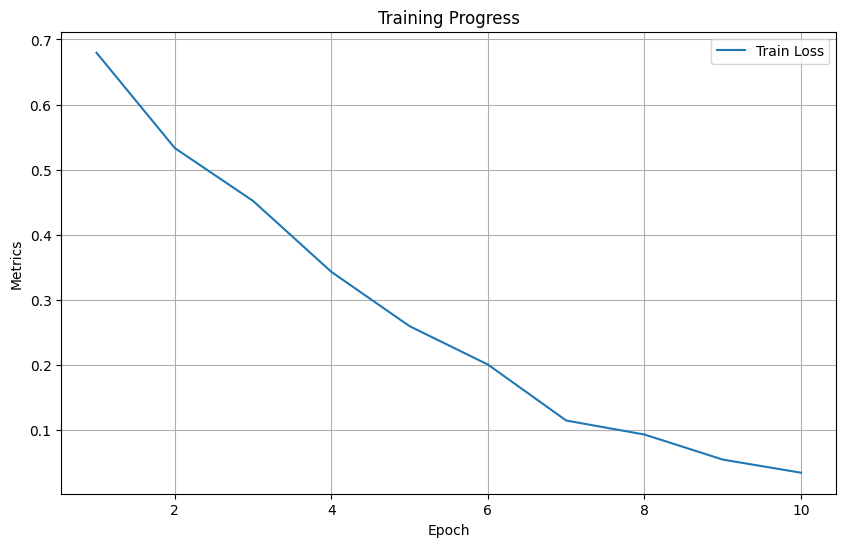

Training ConvNextTiny...
Epoch 1/10 - Train Loss: 0.7539
Epoch 2/10 - Train Loss: 0.5846
Epoch 3/10 - Train Loss: 0.4454
Epoch 4/10 - Train Loss: 0.3201
Epoch 5/10 - Train Loss: 0.1776
Epoch 6/10 - Train Loss: 0.1430
Epoch 7/10 - Train Loss: 0.1847
Epoch 8/10 - Train Loss: 0.1282
Epoch 9/10 - Train Loss: 0.0516
Epoch 10/10 - Train Loss: 0.0191


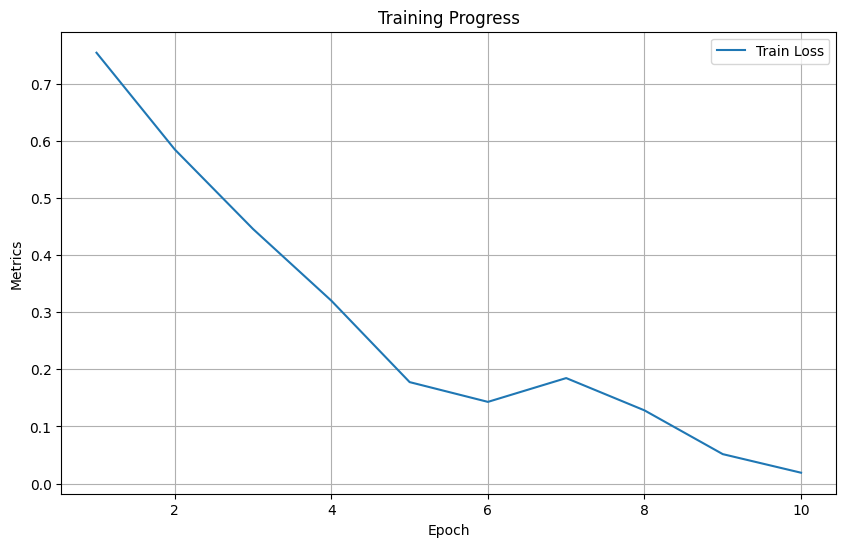

In [ ]:
from timm import create_model
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt
from facenet_pytorch import MTCNN
import numpy as np

class ProcessedDataset(Dataset):
    def __init__(self, df, transform=None):
        self.img_name = df['name']
        self.labels = df['label']
        self.transform = transform

    def __len__(self):
        return len(self.img_name)

    def __getitem__(self, idx):
        img_name = self.img_name[idx]
        label = self.labels[idx]
        img_path = os.path.join('./2_processed_videos', img_name)

        image = Image.open(img_path)

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.float32)


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 데이터셋 및 DataLoader 생성
train_dataset = ProcessedDataset(train_df, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

class CustomEfficientNetB0(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomEfficientNetB0, self).__init__()
        self.backbone = create_model("efficientnet_b0", pretrained=pretrained)
        self.backbone.reset_classifier(0)  # 기존 FC 레이어 제거
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])  # GAP
        x = self.fc(x)
        return x

# ConvNextTiny 모델 정의
class CustomConvNextTiny(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomConvNextTiny, self).__init__()
        self.backbone = create_model("convnext_tiny", pretrained=pretrained)
        self.backbone.reset_classifier(0)  # 기존 FC 레이어 제거
        self.fc1 = nn.Linear(self.backbone.num_features, 512)  # 파라미터 수 증가
        self.fc2 = nn.Linear(512, num_classes)
        self.dropout = nn.Dropout(0.4)

    def forward(self, x):
        x = self.backbone(x)
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# 모델 초기화
efficientnet_b0 = CustomEfficientNetB0(pretrained=True).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
convnext_tiny = CustomConvNextTiny(pretrained=True).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

# 손실 함수 및 옵티마이저 정의
criterion = nn.BCEWithLogitsLoss()

# EfficientNet-B0 옵티마이저와 스케줄러
optimizer_efficientnet = optim.Adam(efficientnet_b0.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler_efficientnet = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_efficientnet, mode="min", factor=0.5, patience=2)

# ConvNextTiny 옵티마이저와 스케줄러
optimizer_convnext = optim.Adam(convnext_tiny.parameters(), lr=2e-5, weight_decay=1e-4)
scheduler_convnext = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_convnext, mode="min", factor=0.5, patience=2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def train(model, optimizer, scheduler, train_loader, num_epochs=10):
    train_losses = []

    for epoch in range(num_epochs):
        # 학습 단계
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}")

    # 결과 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
    plt.title("Training Progress")
    plt.xlabel("Epoch")
    plt.ylabel("Metrics")
    plt.legend()
    plt.grid()
    plt.show()

def evaluate_model(model, val_loader):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            predictions = torch.round(torch.sigmoid(outputs))
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    return val_loss / len(val_loader), accuracy

# EfficientNet-B0 학습 호출
print("Training EfficientNet-B0...")
train(efficientnet_b0, optimizer_efficientnet, scheduler_efficientnet, train_loader, num_epochs=10)

# ConvNextTiny 학습 호출
print("Training ConvNextTiny...")
train(convnext_tiny, optimizer_convnext, scheduler_convnext, train_loader, num_epochs=10)

# 5 -1. Test Code
## lr = 2e-5 를 적용한 Test 값

Testing EfficientNet-B0...
EfficientNet-B0 Test Metrics:
Loss: 0.47
Accuracy (%): 62.86
Precision (%): 61.90
Recall (%): 72.22
F1 Score (%): 66.67


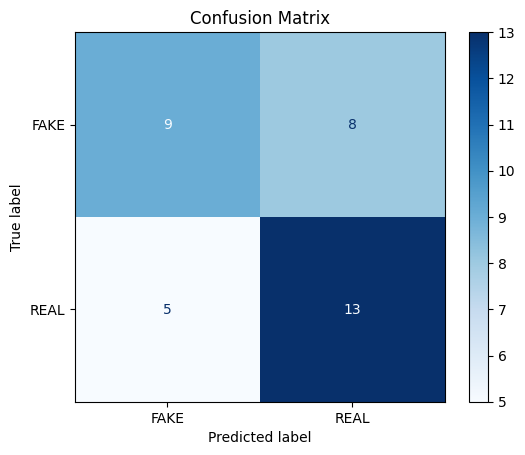


Testing ConvNext Tiny...
ConvNext Tiny Test Metrics:
Loss: 0.40
Accuracy (%): 85.71
Precision (%): 93.33
Recall (%): 77.78
F1 Score (%): 84.85


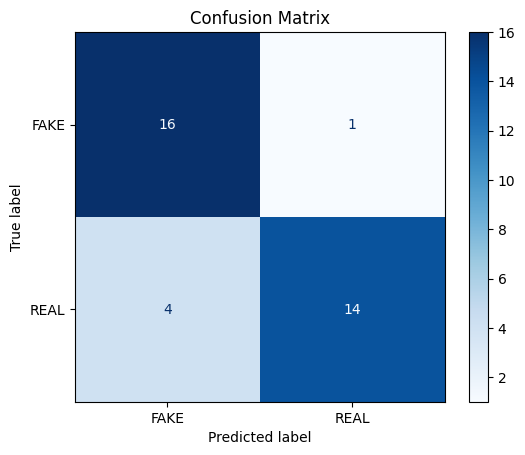

In [ ]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 테스트 함수 정의
def test_model(model, test_loader, device):
    """
    모델 테스트 함수.
    Args:
        model: 학습된 모델
        test_loader: 테스트 데이터 로더
        device: 실행할 장치 (CPU 또는 GPU)
    Returns:
        metrics: 테스트 성능 지표 딕셔너리
        y_true, y_pred: 실제 레이블과 예측 레이블
    """
    model.eval()
    y_true, y_pred = [], []
    test_loss = 0.0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            preds = torch.sigmoid(outputs).cpu().numpy() > 0.5  # 예측값 이진화
            y_pred.extend(preds.flatten())
            y_true.extend(labels.cpu().numpy().flatten())

    test_loss /= len(test_loader)
    accuracy = accuracy_score(y_true, y_pred) * 100
    precision = precision_score(y_true, y_pred, zero_division=0) * 100
    recall = recall_score(y_true, y_pred, zero_division=0) * 100
    f1 = f1_score(y_true, y_pred, zero_division=0) * 100

    metrics = {
        "Loss": test_loss,
        "Accuracy (%)": accuracy,
        "Precision (%)": precision,
        "Recall (%)": recall,
        "F1 Score (%)": f1,
    }

    return metrics, y_true, y_pred


# 혼동 행렬 시각화 함수
def plot_confusion_matrix(y_true, y_pred, class_names=["FAKE", "REAL"]):
    """
    혼동 행렬 시각화.
    Args:
        y_true (list): 실제 레이블
        y_pred (list): 예측 레이블
        class_names (list): 클래스 이름
    """
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()


test_dataset = ProcessedDataset(test_df, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

device = 'cuda'
# 모델 테스트: EfficientNet-B0
print("Testing EfficientNet-B0...")
efficientnet_metrics, y_true, y_pred = test_model(efficientnet_b0, test_loader, device)
print("EfficientNet-B0 Test Metrics:")
for metric, value in efficientnet_metrics.items():
    print(f"{metric}: {value:.2f}")

# 혼동 행렬 시각화: EfficientNet-B0
plot_confusion_matrix(y_true, y_pred)

# 모델 테스트: ConvNext Tiny
print("\nTesting ConvNext Tiny...")
convnext_metrics, y_true, y_pred = test_model(convnext_tiny, test_loader, device)
print("ConvNext Tiny Test Metrics:")
for metric, value in convnext_metrics.items():
    print(f"{metric}: {value:.2f}")

# 혼동 행렬 시각화: ConvNext Tiny
plot_confusion_matrix(y_true, y_pred)


아래 사진은 전처리한 processed_videos만 다르고 언더피팅 해결 적용 조건은 동일한 결과 값
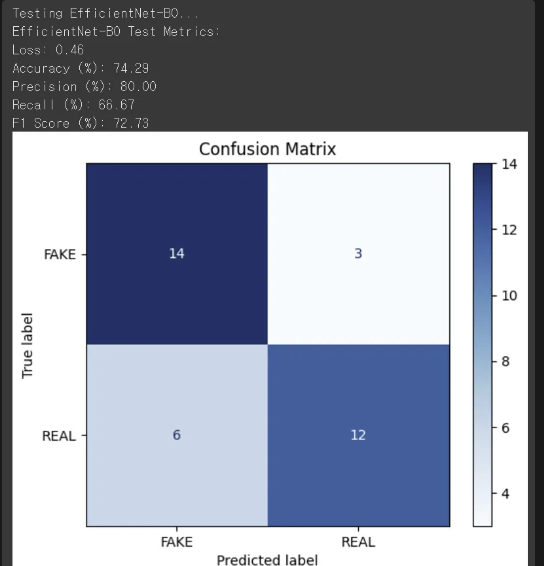
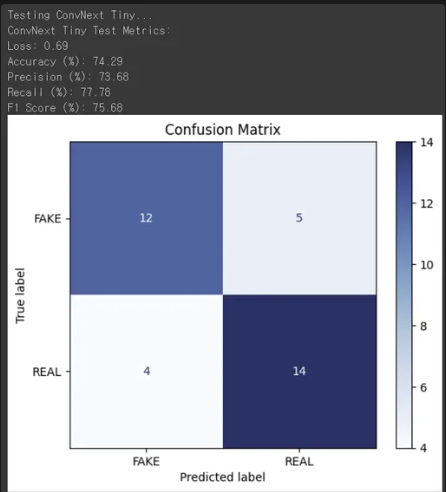



---



# 4-2. Train
## lr = 0.005 적용

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/114M [00:00<?, ?B/s]

Training EfficientNet-B0...
Epoch 1/10 - Train Loss: 0.6898
Epoch 2/10 - Train Loss: 0.5441
Epoch 3/10 - Train Loss: 0.4579
Epoch 4/10 - Train Loss: 0.3555
Epoch 5/10 - Train Loss: 0.2758
Epoch 6/10 - Train Loss: 0.1736
Epoch 7/10 - Train Loss: 0.1228
Epoch 8/10 - Train Loss: 0.0899
Epoch 9/10 - Train Loss: 0.0698
Epoch 10/10 - Train Loss: 0.0400


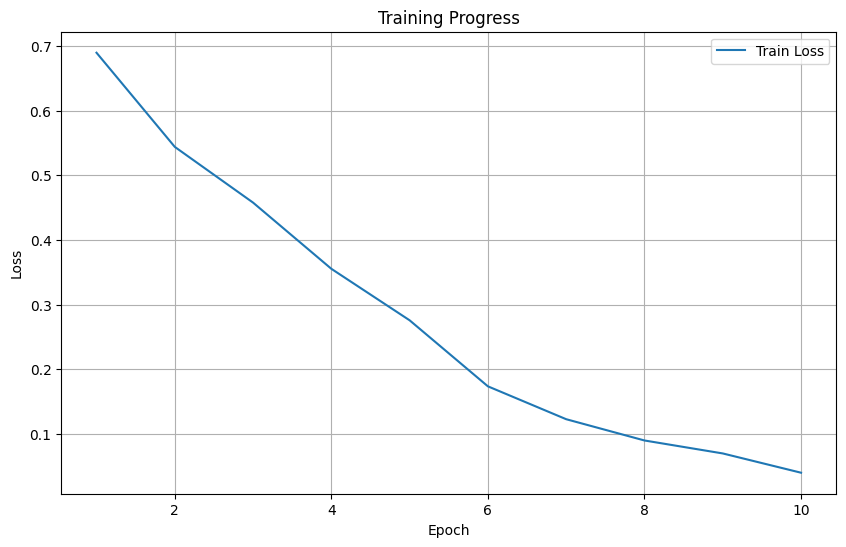

Training ConvNextTiny...
Epoch 1/10 - Train Loss: 8.1253
Epoch 2/10 - Train Loss: 2.5146
Epoch 3/10 - Train Loss: 1.1391
Epoch 4/10 - Train Loss: 0.8093
Epoch 5/10 - Train Loss: 0.7997
Epoch 6/10 - Train Loss: 0.8172
Epoch 7/10 - Train Loss: 0.7760
Epoch 8/10 - Train Loss: 0.7219
Epoch 9/10 - Train Loss: 0.6983
Epoch 10/10 - Train Loss: 0.6949


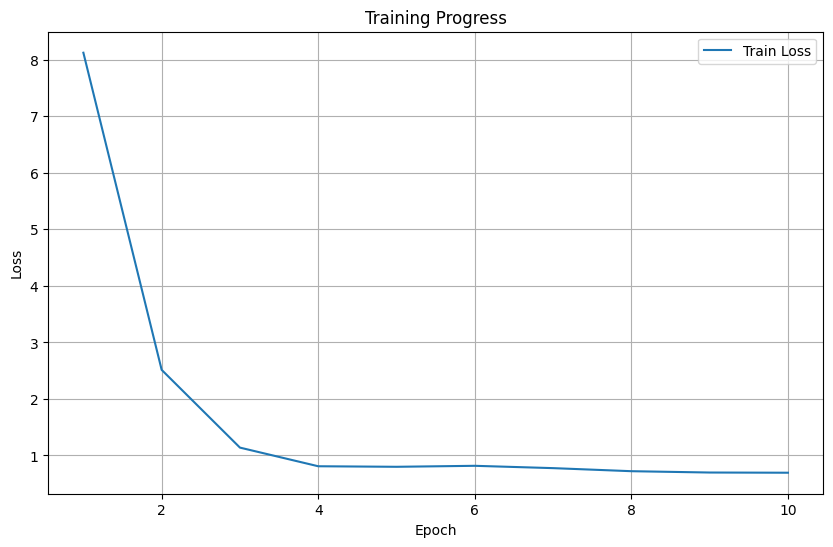

In [ ]:
from timm import create_model
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt
from facenet_pytorch import MTCNN
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Custom Dataset Class
class ProcessedDataset(Dataset):
    def __init__(self, df, transform=None):
        self.img_name = df['name']
        self.labels = df['label']
        self.transform = transform

    def __len__(self):
        return len(self.img_name)

    def __getitem__(self, idx):
        img_name = self.img_name[idx]
        label = self.labels[idx]
        img_path = os.path.join('./processed_videos', img_name)

        image = Image.open(img_path)

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.float32)

# Data Transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# DataLoader 생성
train_dataset = ProcessedDataset(train_df, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# EfficientNet-B0 모델 정의
class CustomEfficientNetB0(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomEfficientNetB0, self).__init__()
        self.backbone = create_model("efficientnet_b0", pretrained=pretrained)
        self.backbone.reset_classifier(0)  # 기존 FC 레이어 제거
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])  # GAP
        x = self.fc(x)
        return x

# ConvNextTiny 모델 정의
class CustomConvNextTiny(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomConvNextTiny, self).__init__()
        self.backbone = create_model("convnext_tiny", pretrained=pretrained)
        self.backbone.reset_classifier(0)  # 기존 FC 레이어 제거
        self.fc1 = nn.Linear(self.backbone.num_features, 512)  # 파라미터 수 증가
        self.fc2 = nn.Linear(512, num_classes)
        self.dropout = nn.Dropout(0.4)

    def forward(self, x):
        x = self.backbone(x)
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# 모델 초기화
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
efficientnet_b0 = CustomEfficientNetB0(pretrained=True).to(device)
convnext_tiny = CustomConvNextTiny(pretrained=True).to(device)

# 손실 함수 및 옵티마이저 정의
criterion = nn.BCEWithLogitsLoss()

# Optimizer 및 Scheduler
optimizer_efficientnet = optim.Adam(efficientnet_b0.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler_efficientnet = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_efficientnet, mode="min", factor=0.5, patience=2)

optimizer_convnext = optim.Adam(convnext_tiny.parameters(), lr=0.005, weight_decay=1e-4)
scheduler_convnext = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_convnext, mode="min", factor=0.5, patience=2)

# Training Loop
def train(model, optimizer, scheduler, train_loader, num_epochs=10):
    train_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}")

    # Plot Training Loss
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
    plt.title("Training Progress")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

# Evaluation Function
def evaluate_model(model, val_loader):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            predictions = torch.round(torch.sigmoid(outputs))
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())

    accuracy = correct / total

    # Confusion Matrix & Classification Report
    cm = confusion_matrix(all_labels, all_predictions)
    print("\nConfusion Matrix:")
    print(cm)

    report = classification_report(all_labels, all_predictions, target_names=["FAKE", "REAL"], zero_division=0)
    print("\nClassification Report:")
    print(report)

    return val_loss / len(val_loader), accuracy

# 학습 호출
print("Training EfficientNet-B0...")
train(efficientnet_b0, optimizer_efficientnet, scheduler_efficientnet, train_loader, num_epochs=10)

print("Training ConvNextTiny...")
train(convnext_tiny, optimizer_convnext, scheduler_convnext, train_loader, num_epochs=10)

# 5-2. Test Code
## lr = 0.005 적용

Testing EfficientNet-B0...
EfficientNet-B0 Test Metrics:
Loss: 0.51
Accuracy (%): 74.29
Precision (%): 76.47
Recall (%): 72.22
F1 Score (%): 74.29


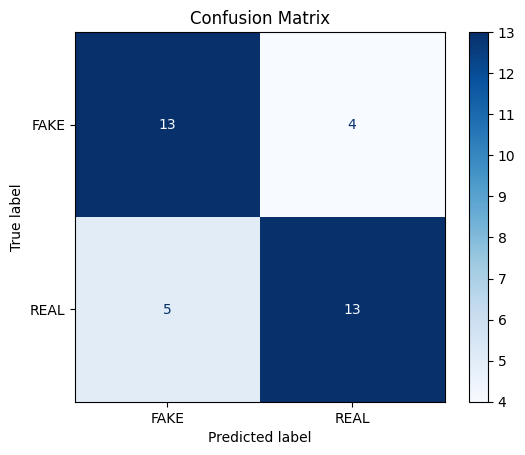


Testing ConvNext Tiny...
ConvNext Tiny Test Metrics:
Loss: 0.70
Accuracy (%): 51.43
Precision (%): 51.43
Recall (%): 100.00
F1 Score (%): 67.92


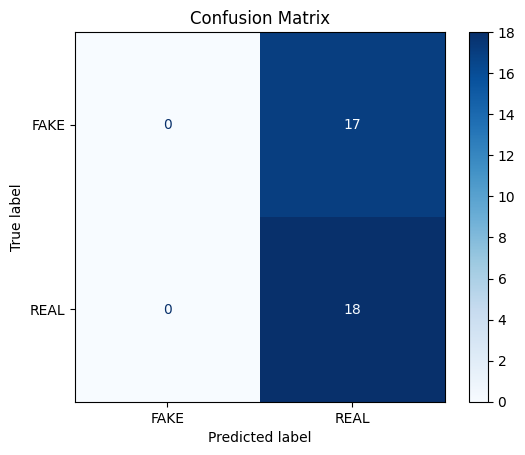

In [ ]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 테스트 함수 정의
def test_model(model, test_loader, device):
    """
    모델 테스트 함수.
    Args:
        model: 학습된 모델
        test_loader: 테스트 데이터 로더
        device: 실행할 장치 (CPU 또는 GPU)
    Returns:
        metrics: 테스트 성능 지표 딕셔너리
        y_true, y_pred: 실제 레이블과 예측 레이블
    """
    model.eval()
    y_true, y_pred = [], []
    test_loss = 0.0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            preds = torch.sigmoid(outputs).cpu().numpy() > 0.5  # 예측값 이진화
            y_pred.extend(preds.flatten())
            y_true.extend(labels.cpu().numpy().flatten())

    test_loss /= len(test_loader)
    accuracy = accuracy_score(y_true, y_pred) * 100
    precision = precision_score(y_true, y_pred, zero_division=0) * 100
    recall = recall_score(y_true, y_pred, zero_division=0) * 100
    f1 = f1_score(y_true, y_pred, zero_division=0) * 100

    metrics = {
        "Loss": test_loss,
        "Accuracy (%)": accuracy,
        "Precision (%)": precision,
        "Recall (%)": recall,
        "F1 Score (%)": f1,
    }

    return metrics, y_true, y_pred


# 혼동 행렬 시각화 함수
def plot_confusion_matrix(y_true, y_pred, class_names=["FAKE", "REAL"]):
    """
    혼동 행렬 시각화.
    Args:
        y_true (list): 실제 레이블
        y_pred (list): 예측 레이블
        class_names (list): 클래스 이름
    """
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()


test_dataset = ProcessedDataset(test_df, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

device = 'cuda'
# 모델 테스트: EfficientNet-B0
print("Testing EfficientNet-B0...")
efficientnet_metrics, y_true, y_pred = test_model(efficientnet_b0, test_loader, device)
print("EfficientNet-B0 Test Metrics:")
for metric, value in efficientnet_metrics.items():
    print(f"{metric}: {value:.2f}")

# 혼동 행렬 시각화: EfficientNet-B0
plot_confusion_matrix(y_true, y_pred)

# 모델 테스트: ConvNext Tiny
print("\nTesting ConvNext Tiny...")
convnext_metrics, y_true, y_pred = test_model(convnext_tiny, test_loader, device)
print("ConvNext Tiny Test Metrics:")
for metric, value in convnext_metrics.items():
    print(f"{metric}: {value:.2f}")

# 혼동 행렬 시각화: ConvNext Tiny
plot_confusion_matrix(y_true, y_pred)

Training EfficientNet-B0...
Epoch 1/10 - Train Loss: 0.6925
Epoch 2/10 - Train Loss: 0.5593
Epoch 3/10 - Train Loss: 0.4699
Epoch 4/10 - Train Loss: 0.4070
Epoch 5/10 - Train Loss: 0.2938
Epoch 6/10 - Train Loss: 0.2095
Epoch 7/10 - Train Loss: 0.1559
Epoch 8/10 - Train Loss: 0.1074
Epoch 9/10 - Train Loss: 0.0897
Epoch 10/10 - Train Loss: 0.0485


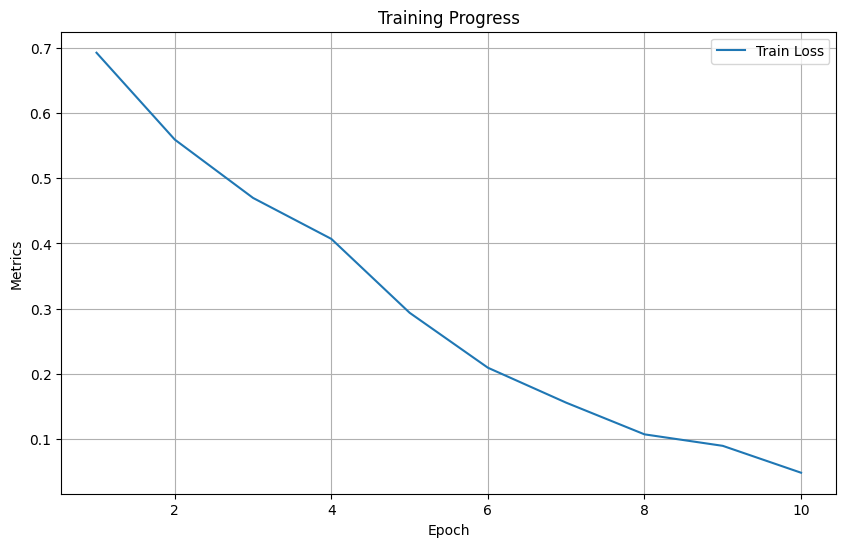

Training ConvNextTiny...
Epoch 1/10 - Train Loss: 0.8368
Epoch 2/10 - Train Loss: 0.8618
Epoch 3/10 - Train Loss: 0.8176
Epoch 4/10 - Train Loss: 0.7914
Epoch 5/10 - Train Loss: 0.7685
Epoch 6/10 - Train Loss: 0.8066
Epoch 7/10 - Train Loss: 0.7772
Epoch 8/10 - Train Loss: 0.7817
Epoch 9/10 - Train Loss: 0.7278
Epoch 10/10 - Train Loss: 0.7467


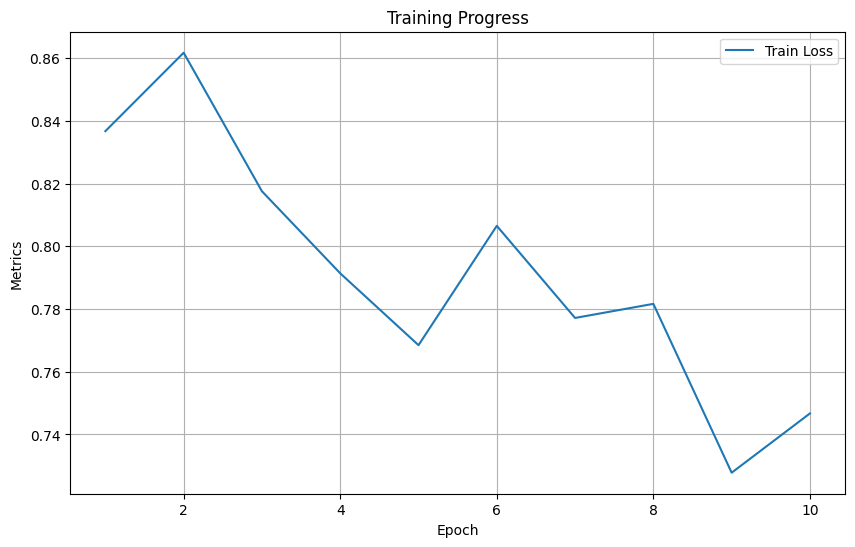

In [ ]:
from timm import create_model
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt
from facenet_pytorch import MTCNN
import numpy as np

class ProcessedDataset(Dataset):
    def __init__(self, df, transform=None):
        self.img_name = df['name']
        self.labels = df['label']
        self.transform = transform

    def __len__(self):
        return len(self.img_name)

    def __getitem__(self, idx):
        img_name = self.img_name[idx]
        label = self.labels[idx]
        img_path = os.path.join('./2_processed_videos', img_name)

        image = Image.open(img_path)

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.float32)


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 데이터셋 및 DataLoader 생성
train_dataset = ProcessedDataset(train_df, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

class CustomEfficientNetB0(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomEfficientNetB0, self).__init__()
        self.backbone = create_model("efficientnet_b0", pretrained=pretrained)
        self.backbone.reset_classifier(0)  # 기존 FC 레이어 제거
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])  # GAP
        x = self.fc(x)
        return x

# ConvNextTiny 모델 정의
class CustomConvNextTiny(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomConvNextTiny, self).__init__()
        self.backbone = create_model("convnext_tiny", pretrained=pretrained)
        self.backbone.reset_classifier(0)  # 기존 FC 레이어 제거
        self.fc1 = nn.Linear(self.backbone.num_features, 512)  # 파라미터 수 증가
        self.fc2 = nn.Linear(512, num_classes)
        self.dropout = nn.Dropout(0.4)

    def forward(self, x):
        x = self.backbone(x)
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# 모델 초기화
efficientnet_b0 = CustomEfficientNetB0(pretrained=True).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
convnext_tiny = CustomConvNextTiny(pretrained=True).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

# 손실 함수 및 옵티마이저 정의
criterion = nn.BCEWithLogitsLoss()

# EfficientNet-B0 옵티마이저와 스케줄러
optimizer_efficientnet = optim.Adam(efficientnet_b0.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler_efficientnet = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_efficientnet, mode="min", factor=0.5, patience=2)

# ConvNextTiny 옵티마이저와 스케줄러
optimizer_convnext = optim.Adam(convnext_tiny.parameters(), lr=1e-7, weight_decay=1e-4)
scheduler_convnext = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_convnext, mode="min", factor=0.5, patience=2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def train(model, optimizer, scheduler, train_loader, num_epochs=10):
    train_losses = []

    for epoch in range(num_epochs):
        # 학습 단계
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}")

    # 결과 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
    plt.title("Training Progress")
    plt.xlabel("Epoch")
    plt.ylabel("Metrics")
    plt.legend()
    plt.grid()
    plt.show()

def evaluate_model(model, val_loader):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            predictions = torch.round(torch.sigmoid(outputs))
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    return val_loss / len(val_loader), accuracy

# EfficientNet-B0 학습 호출
print("Training EfficientNet-B0...")
train(efficientnet_b0, optimizer_efficientnet, scheduler_efficientnet, train_loader, num_epochs=10)

# ConvNextTiny 학습 호출
print("Training ConvNextTiny...")
train(convnext_tiny, optimizer_convnext, scheduler_convnext, train_loader, num_epochs=10)

Testing EfficientNet-B0...
EfficientNet-B0 Test Metrics:
Loss: 0.56
Accuracy (%): 68.57
Precision (%): 70.59
Recall (%): 66.67
F1 Score (%): 68.57


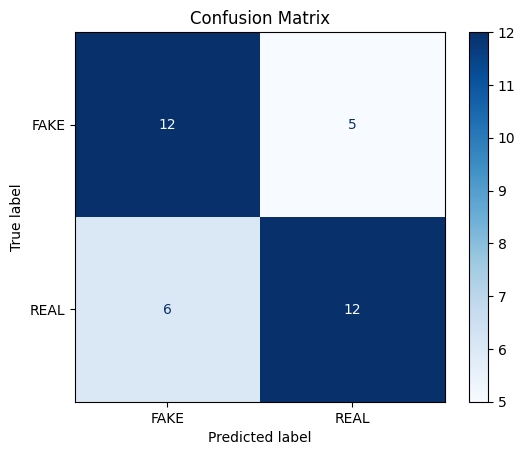


Testing ConvNext Tiny...
ConvNext Tiny Test Metrics:
Loss: 0.66
Accuracy (%): 45.71
Precision (%): 33.33
Recall (%): 5.56
F1 Score (%): 9.52


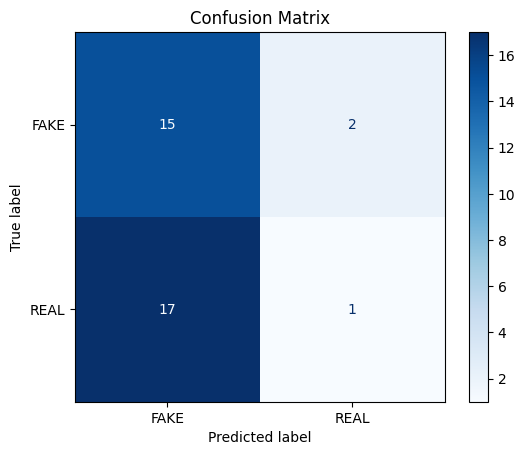

In [ ]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 테스트 함수 정의
def test_model(model, test_loader, device):
    """
    모델 테스트 함수.
    Args:
        model: 학습된 모델
        test_loader: 테스트 데이터 로더
        device: 실행할 장치 (CPU 또는 GPU)
    Returns:
        metrics: 테스트 성능 지표 딕셔너리
        y_true, y_pred: 실제 레이블과 예측 레이블
    """
    model.eval()
    y_true, y_pred = [], []
    test_loss = 0.0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            preds = torch.sigmoid(outputs).cpu().numpy() > 0.5  # 예측값 이진화
            y_pred.extend(preds.flatten())
            y_true.extend(labels.cpu().numpy().flatten())

    test_loss /= len(test_loader)
    accuracy = accuracy_score(y_true, y_pred) * 100
    precision = precision_score(y_true, y_pred, zero_division=0) * 100
    recall = recall_score(y_true, y_pred, zero_division=0) * 100
    f1 = f1_score(y_true, y_pred, zero_division=0) * 100

    metrics = {
        "Loss": test_loss,
        "Accuracy (%)": accuracy,
        "Precision (%)": precision,
        "Recall (%)": recall,
        "F1 Score (%)": f1,
    }

    return metrics, y_true, y_pred


# 혼동 행렬 시각화 함수
def plot_confusion_matrix(y_true, y_pred, class_names=["FAKE", "REAL"]):
    """
    혼동 행렬 시각화.
    Args:
        y_true (list): 실제 레이블
        y_pred (list): 예측 레이블
        class_names (list): 클래스 이름
    """
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()


test_dataset = ProcessedDataset(test_df, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

device = 'cuda'
# 모델 테스트: EfficientNet-B0
print("Testing EfficientNet-B0...")
efficientnet_metrics, y_true, y_pred = test_model(efficientnet_b0, test_loader, device)
print("EfficientNet-B0 Test Metrics:")
for metric, value in efficientnet_metrics.items():
    print(f"{metric}: {value:.2f}")

# 혼동 행렬 시각화: EfficientNet-B0
plot_confusion_matrix(y_true, y_pred)

# 모델 테스트: ConvNext Tiny
print("\nTesting ConvNext Tiny...")
convnext_metrics, y_true, y_pred = test_model(convnext_tiny, test_loader, device)
print("ConvNext Tiny Test Metrics:")
for metric, value in convnext_metrics.items():
    print(f"{metric}: {value:.2f}")

# 혼동 행렬 시각화: ConvNext Tiny
plot_confusion_matrix(y_true, y_pred)